<center> <b>CREDIT RISK MODELING</b> </center>

Group: 
<br>
Marcio Jonavicius Rodrigues M20201191
<br>
João Borges
<br>
Francisco Simoes 
<br>
Bernado Santos
<br>
Stephanie
<br>
Angela Menezes
<br>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import time

In [2]:
%matplotlib inline
#Opção 
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv("dataset.csv", sep=";", encoding = 'latin_1') 

In [4]:
df.head(5)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt
0,1,1,2500,2500,2500.0,36 months,13.56,84.92,C,Chef,10+ years,RENT,55000.0,Not Verified,Dec-18,Current,debt_consolidation,NY,18.24,0,Apr-01,1.0,9,1,4341,10.3,34,2386.02,167.02
1,2,2,30000,30000,30000.0,60 months,18.94,777.23,D,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-18,Current,debt_consolidation,LA,26.52,0,Jun-87,0.0,13,1,12315,24.2,44,29387.75,1507.11
2,3,3,5000,5000,5000.0,36 months,17.97,180.69,D,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-18,Current,debt_consolidation,MI,10.51,0,Apr-11,0.0,8,0,4599,19.1,13,4787.21,353.89
3,4,4,4000,4000,4000.0,36 months,18.94,146.51,D,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-18,Current,debt_consolidation,WA,16.74,0,Feb-06,0.0,10,0,5468,78.1,13,3831.93,286.71
4,5,5,30000,30000,30000.0,60 months,16.14,731.78,C,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-18,Current,debt_consolidation,MD,26.35,0,Dec-00,0.0,12,0,829,3.6,26,29339.02,1423.21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1048575 non-null  int64  
 1   id                   1048575 non-null  int64  
 2   loan_amnt            1048575 non-null  int64  
 3   funded_amnt          1048575 non-null  int64  
 4   funded_amnt_inv      1048575 non-null  float64
 5   term                 1048575 non-null  object 
 6   int_rate             1048575 non-null  float64
 7   installment          1048575 non-null  float64
 8   grade                1048575 non-null  object 
 9   emp_title            958131 non-null   object 
 10  emp_length           971110 non-null   object 
 11  home_ownership       1048575 non-null  object 
 12  annual_inc           1048575 non-null  float64
 13  verification_status  1048575 non-null  object 
 14  issue_d              1048575 non-null  object 
 15

In [6]:
df.dtypes

Unnamed: 0               int64
id                       int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
delinq_2yrs              int64
earliest_cr_line        object
inq_last_6mths         float64
open_acc                 int64
pub_rec                  int64
revol_bal                int64
revol_util             float64
total_acc                int64
out_prncp              float64
total_pymnt            float64
dtype: object

In [7]:
#Describe without scientic notation 
pd.options.display.float_format = '{:,.10f}'.format
# To reset pd.reset_option('^display.', silent=True)
df.describe()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt
count,"1,048,575.0000000000","1,048,575.0000000000","1,048,575.0000000000","1,048,575.0000000000","1,048,575.0000000000","1,048,575.0000000000","1,048,575.0000000000","1,048,575.0000000000","1,047,378.0000000000","1,048,575.0000000000","1,048,574.0000000000","1,048,575.0000000000","1,048,575.0000000000","1,048,575.0000000000","1,047,674.0000000000","1,048,575.0000000000","1,048,575.0000000000","1,048,575.0000000000"
mean,"524,288.0000000000","524,288.0000000000","15,384.8736618744","15,384.8469589681","15,379.7533340899",12.8029003553,453.8249053909,"79,674.6067514301",19.2893302418,0.2974493956,0.5077972561,11.7054421477,0.1962825740,"16,724.8425606180",47.6889003640,23.7159907494,"6,812.7552569914","9,541.0645445459"
std,"302,697.6735934851","302,697.6735934851","9,533.8378041676","9,533.8396823643","9,532.4731173056",4.9627786785,276.2068910318,"84,101.8325236139",15.8960219965,0.8579353623,0.8039759117,5.8462880750,0.5669038697,"23,441.6972523808",24.7940276219,12.1172790832,"8,946.7881178410","9,234.6121306415"
min,1.0000000000,1.0000000000,"1,000.0000000000","1,000.0000000000",725.0000000000,5.3100000000,14.7700000000,0.0000000000,-1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,2.0000000000,0.0000000000,0.0000000000
25%,"262,144.5000000000","262,144.5000000000","8,000.0000000000","8,000.0000000000","8,000.0000000000",9.1600000000,251.6500000000,"47,000.0000000000",11.9300000000,0.0000000000,0.0000000000,8.0000000000,0.0000000000,"5,722.0000000000",28.5000000000,15.0000000000,0.0000000000,"2,603.6600000000"
50%,"524,288.0000000000","524,288.0000000000","13,000.0000000000","13,000.0000000000","13,000.0000000000",11.9900000000,380.6600000000,"66,000.0000000000",18.0500000000,0.0000000000,0.0000000000,11.0000000000,0.0000000000,"11,107.0000000000",46.9000000000,22.0000000000,"2,543.4400000000","6,338.3100000000"
75%,"786,431.5000000000","786,431.5000000000","20,000.0000000000","20,000.0000000000","20,000.0000000000",15.4900000000,609.4400000000,"95,000.0000000000",25.0200000000,0.0000000000,1.0000000000,15.0000000000,0.0000000000,"20,122.0000000000",66.4000000000,30.0000000000,"11,011.8850000000","13,426.2456150000"
max,"1,048,575.0000000000","1,048,575.0000000000","40,000.0000000000","40,000.0000000000","40,000.0000000000",30.9900000000,"1,670.1500000000","9,930,475.0000000000",999.0000000000,58.0000000000,5.0000000000,101.0000000000,86.0000000000,"2,358,150.0000000000",191.0000000000,176.0000000000,"40,000.0000000000","59,808.2620900000"


<p style="color:red"><b>Response variable</b> </p>


In [8]:
df['loan_status'].value_counts() 

Current               603273
Fully Paid            331528
Charged Off            94286
Late (31-120 days)     12154
In Grace Period         5151
Late (16-30 days)       2162
Default                   21
Name: loan_status, dtype: int64

<b> Criteria for the Response variable: </b> 
<br><br>
<b> Good Client </b>:
<br>
Current
<br>
Fully Paid 
<br><br>
<b> Bad Client </b>:
<br>
Charged Off 
<br>
Default:failure to fulfil an obligation  
Late (31-120 days) 

<b> Delete </b>:
<br>
In Grace Period         
Late (16-30 days)       

In [9]:
# Primeira var
inicio = time.time()
conditions = [
    (df['loan_status'].str.strip()  == "Current"),
    (df['loan_status'].str.strip()  == "Fully Paid"),
    (df['loan_status'].str.strip()  == "Charged Off"),
    (df['loan_status'].str.strip()  == "Default"),
    (df['loan_status'].str.strip()  == "Late (31-120 days)"),
    (df['loan_status'].str.strip()  == "In Grace Period"),
    (df['loan_status'].str.strip()  == "Late (16-30 days)")]
choices = [0,0,1,1,1,2,2]

df['Default'] = np.select(conditions, choices, default='null')

fim = time.time()
print(fim - inicio)

4.511897802352905


In [10]:
df['Default'].value_counts() 

0    934801
1    106461
2      7313
Name: Default, dtype: int64

In [11]:
# drop elements = 2 
df=df[df['Default']!='2']   

In [12]:
df['Default'].value_counts() 

0    934801
1    106461
Name: Default, dtype: int64

In [13]:
df['Default'].describe()

count     1041262
unique          2
top             0
freq       934801
Name: Default, dtype: object

In [14]:
#converte the Default variable from object to int
df['Default']=df['Default'].astype(int)

<p style="color:red"><b>Missing value treatment</b> </p>

In [15]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("The dataframe have " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns with missing value.")
        
        return mis_val_table_ren_columns

In [16]:
missing_values_table(df)

The dataframe have 30 columns.
There are 5 columns with missing value.


,Missing Values,% of Total Values
emp_title,89705,8.6000000000
emp_length,76844,7.4000000000
dti,1184,0.1000000000
revol_util,896,0.1000000000
inq_last_6mths,1,0.0000000000


In [17]:
## Verificar se tem missing 
df.isnull().sum() 

Unnamed: 0                 0
id                         0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_title              89705
emp_length             76844
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                     1184
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             1
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               896
total_acc                  0
out_prncp                  0
total_pymnt                0
Default                    0
dtype: int64

We are going to use 3 kinds of data tretament: 
<br> 
1 Create a category to the missing value:   
As missing values are also a kind of information, we created a category missing to the variable emp_title and emp_length 
<br> 
2 Delete elements:   
we are going to delete the missing of the variable inq_last_6mths because the quantity is not relevant 
<br> 
3 Missing values imputing:   
dti revol_util 
<br> 



1 Create a category to the missing value:

In [18]:
df['emp_length'].value_counts(dropna=False)

10+ years    348151
2 years       93995
< 1 year      85168
3 years       84299
NaN           76844
1 year        69564
5 years       63941
4 years       63456
6 years       44942
8 years       40577
7 years       36359
9 years       33966
Name: emp_length, dtype: int64

In [19]:
df['emp_length'].fillna(("missing"), inplace=True)

In [20]:
df['emp_length'].value_counts(dropna=False)

10+ years    348151
2 years       93995
< 1 year      85168
3 years       84299
missing       76844
1 year        69564
5 years       63941
4 years       63456
6 years       44942
8 years       40577
7 years       36359
9 years       33966
Name: emp_length, dtype: int64

In [21]:
df['emp_title'].fillna(("missing"), inplace=True)

2 Delete elements

In [22]:
df=df[(df['inq_last_6mths'].notnull())]

In [23]:
df.describe()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,Default
count,"1,041,261.0000000000","1,041,261.0000000000","1,041,261.0000000000","1,041,261.0000000000","1,041,261.0000000000","1,041,261.0000000000","1,041,261.0000000000","1,041,261.0000000000","1,040,077.0000000000","1,041,261.0000000000","1,041,261.0000000000","1,041,261.0000000000","1,041,261.0000000000","1,041,261.0000000000","1,040,365.0000000000","1,041,261.0000000000","1,041,261.0000000000","1,041,261.0000000000","1,041,261.0000000000"
mean,"524,622.5005008350","524,622.5005008350","15,370.3034829884","15,370.2765925162","15,365.1802980169",12.7861237865,453.3715657172,"79,672.2002270908",19.2848691491,0.2969572470,0.5072628284,11.7060055068,0.1962476267,"16,727.0665731262",47.6660572011,23.7189782389,"6,779.2255690358","9,545.7803264749",0.1022423773
std,"302,917.0765966586","302,917.0765966586","9,529.9385164643","9,529.9403674996","9,528.5735720119",4.9573075069,276.0352842107,"84,248.6065188291",15.9010213763,0.8573246303,0.8036781387,5.8455746575,0.5670551660,"23,421.9248969787",24.7881595624,12.1152498214,"8,936.6253034485","9,239.2634006553",0.3029669317
min,1.0000000000,1.0000000000,"1,000.0000000000","1,000.0000000000",725.0000000000,5.3100000000,14.7700000000,0.0000000000,-1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,2.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,"262,009.0000000000","262,009.0000000000","8,000.0000000000","8,000.0000000000","8,000.0000000000",9.1600000000,251.4000000000,"47,000.0000000000",11.9300000000,0.0000000000,0.0000000000,8.0000000000,0.0000000000,"5,724.0000000000",28.5000000000,15.0000000000,0.0000000000,"2,603.7000000000",0.0000000000
50%,"525,088.0000000000","525,088.0000000000","13,000.0000000000","13,000.0000000000","13,000.0000000000",11.9900000000,380.5400000000,"66,000.0000000000",18.0400000000,0.0000000000,0.0000000000,11.0000000000,0.0000000000,"11,109.0000000000",46.8000000000,22.0000000000,"2,462.5700000000","6,342.7682700000",0.0000000000
75%,"786,981.0000000000","786,981.0000000000","20,000.0000000000","20,000.0000000000","20,000.0000000000",15.4900000000,609.4400000000,"95,000.0000000000",25.0100000000,0.0000000000,1.0000000000,15.0000000000,0.0000000000,"20,126.0000000000",66.4000000000,30.0000000000,"10,950.7000000000","13,434.3300000000",0.0000000000
max,"1,048,575.0000000000","1,048,575.0000000000","40,000.0000000000","40,000.0000000000","40,000.0000000000",30.9900000000,"1,670.1500000000","9,930,475.0000000000",999.0000000000,58.0000000000,5.0000000000,101.0000000000,86.0000000000,"2,358,150.0000000000",191.0000000000,176.0000000000,"40,000.0000000000","59,808.2620900000",1.0000000000


3 Missing values imputing:

In [24]:
df['revol_util'].fillna((df['revol_util'].mean()), inplace=True)
df['dti'].fillna((df['dti'].mean()), inplace=True)

In [25]:
df.isnull().sum() 

Unnamed: 0             0
id                     0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
out_prncp              0
total_pymnt            0
Default                0
dtype: int64

<h2 style="color:red"><b> Sample  </b> </h2> 

In [26]:
df_sample=df.sample(n=10000, random_state=6)
df_sample.head(5)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,Default
49910,49911,49911,14000,14000,"14,000.0000000000",36 months,8.1900000000,439.9400000000,A,missing,missing,RENT,"50,000.0000000000",Not Verified,Nov-18,Current,debt_consolidation,WA,24.9600000000,0,Sep-00,0.0000000000,10,0,14454,33.0000000000,19,"12,959.7600000000","1,287.9700000000",0
339232,339233,339233,5000,5000,"5,000.0000000000",36 months,7.9600000000,156.5900000000,A,Seinor food and beverage operator,8 years,RENT,"32,000.0000000000",Not Verified,May-18,Current,credit_card,FL,4.4600000000,0,Feb-12,0.0000000000,5,0,3723,47.7000000000,6,"3,859.2600000000","1,404.8900000000",0
1037198,1037199,1037199,16000,16000,"16,000.0000000000",60 months,10.9900000000,347.8000000000,B,Underwriter,4 years,MORTGAGE,"110,000.0000000000",Not Verified,Oct-15,Fully Paid,debt_consolidation,VA,15.2100000000,0,Dec-02,0.0000000000,17,0,13591,36.1000000000,32,0.0000000000,"17,769.2100000000",0
66297,66298,66298,40000,40000,"40,000.0000000000",60 months,11.8000000000,885.7500000000,B,PE/Health Program Supervisor,10+ years,MORTGAGE,"90,000.0000000000",Source Verified,Nov-18,Current,debt_consolidation,IL,12.8900000000,0,Jan-06,0.0000000000,7,0,49816,11.8000000000,50,"38,508.1800000000","2,631.0300000000",0
383185,383186,383186,15000,15000,"15,000.0000000000",36 months,6.7100000000,461.1800000000,A,senior engineer,6 years,MORTGAGE,"123,000.0000000000",Not Verified,Apr-18,Fully Paid,credit_card,MI,19.7100000000,0,Apr-04,0.0000000000,12,0,16135,34.0000000000,29,0.0000000000,"15,296.5347600000",0


<center><h2 style="color:red"><b>Exploratory analysis</b> </h2> </center> 

In [27]:
# As the variables loan_amnt, funded_amnt and funded_amnt_inv look like having the same information, we analise correlation between then
df_2=df.iloc[:, 2:6]


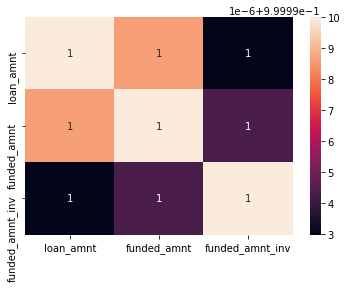

In [28]:
corrMatrix = df_2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [29]:
# as the variables are correlated, we will keep just the variable funded_amnt  

We select the numeric variable to analyse separately

In [30]:
df_num = df_sample.loc[:,['funded_amnt','int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs','inq_last_6mths', 'open_acc', 
                  'revol_bal', 'revol_util','total_acc', 'out_prncp', 'total_pymnt', 'Default']]

Analyse of the correlation between the numerical independent variable 

In [31]:
corr = df_num.corr()
corr.style.background_gradient(cmap='coolwarm')

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,Default
funded_amnt,1.000000,0.079596,0.944656,0.254841,0.018950,-0.028629,-0.019628,0.171995,0.326432,0.093569,0.180312,0.572052,0.545582,0.000257
int_rate,0.079596,1.000000,0.114197,-0.079637,0.149130,0.064045,0.183582,0.005054,-0.021729,0.248067,-0.031149,0.035077,0.061116,0.191744
installment,0.944656,0.114197,1.000000,0.245300,0.018865,-0.009433,0.005486,0.156646,0.316667,0.119338,0.157319,0.473110,0.571123,0.018182
annual_inc,0.254841,-0.079637,0.245300,1.000000,-0.109178,0.035064,0.030129,0.133067,0.229536,0.031851,0.154117,0.135175,0.154632,-0.037523
dti,0.018950,0.149130,0.018865,-0.109178,1.000000,-0.016448,-0.019771,0.167442,0.111281,0.116997,0.142332,0.043590,-0.020896,0.028537
delinq_2yrs,-0.028629,0.064045,-0.009433,0.035064,-0.016448,1.000000,0.032553,0.036915,-0.037337,0.013939,0.123232,-0.069034,0.048150,0.016749
inq_last_6mths,-0.019628,0.183582,0.005486,0.030129,-0.019771,0.032553,1.000000,0.163572,-0.016003,-0.095303,0.151395,-0.066205,0.033913,0.077103
open_acc,0.171995,0.005054,0.156646,0.133067,0.167442,0.036915,0.163572,1.000000,0.250802,-0.125218,0.740947,0.078812,0.110844,0.009719
revol_bal,0.326432,-0.021729,0.316667,0.229536,0.111281,-0.037337,-0.016003,0.250802,1.000000,0.299170,0.211864,0.175217,0.194173,-0.021475
revol_util,0.093569,0.248067,0.119338,0.031851,0.116997,0.013939,-0.095303,-0.125218,0.299170,1.000000,-0.096821,-0.014633,0.138903,0.057227


As installment and funded_amnt as strongly correlated, installment will be deleted

In [32]:
df_num.drop(['installment'], axis='columns', inplace=True)

We select a sample of 1000 elements to make some graphics

In [33]:
df_num_1=df_num.sample(n=1000, random_state=6)
df_num_1.head(5)

,funded_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,Default
268229,18000,10.5600000000,"38,000.0000000000",13.6300000000,0,0.0000000000,4,16685,50.6000000000,17,"14,322.7700000000","4,778.8800000000",0
567308,10000,10.9900000000,"70,000.0000000000",15.2400000000,1,0.0000000000,5,8293,77.5000000000,8,0.0000000000,"5,764.1400000000",1
420,12000,6.4600000000,"38,000.0000000000",31.1100000000,0,0.0000000000,20,4394,15.2000000000,37,"11,392.4300000000",728.6800000000,0
600713,26400,10.9900000000,"90,500.0000000000",19.4100000000,1,0.0000000000,15,32847,39.2000000000,24,0.0000000000,"10,777.2400000000",1
96790,17000,16.1400000000,"65,000.0000000000",16.7200000000,0,0.0000000000,8,4462,72.0000000000,15,"16,240.7300000000","1,643.4800000000",0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


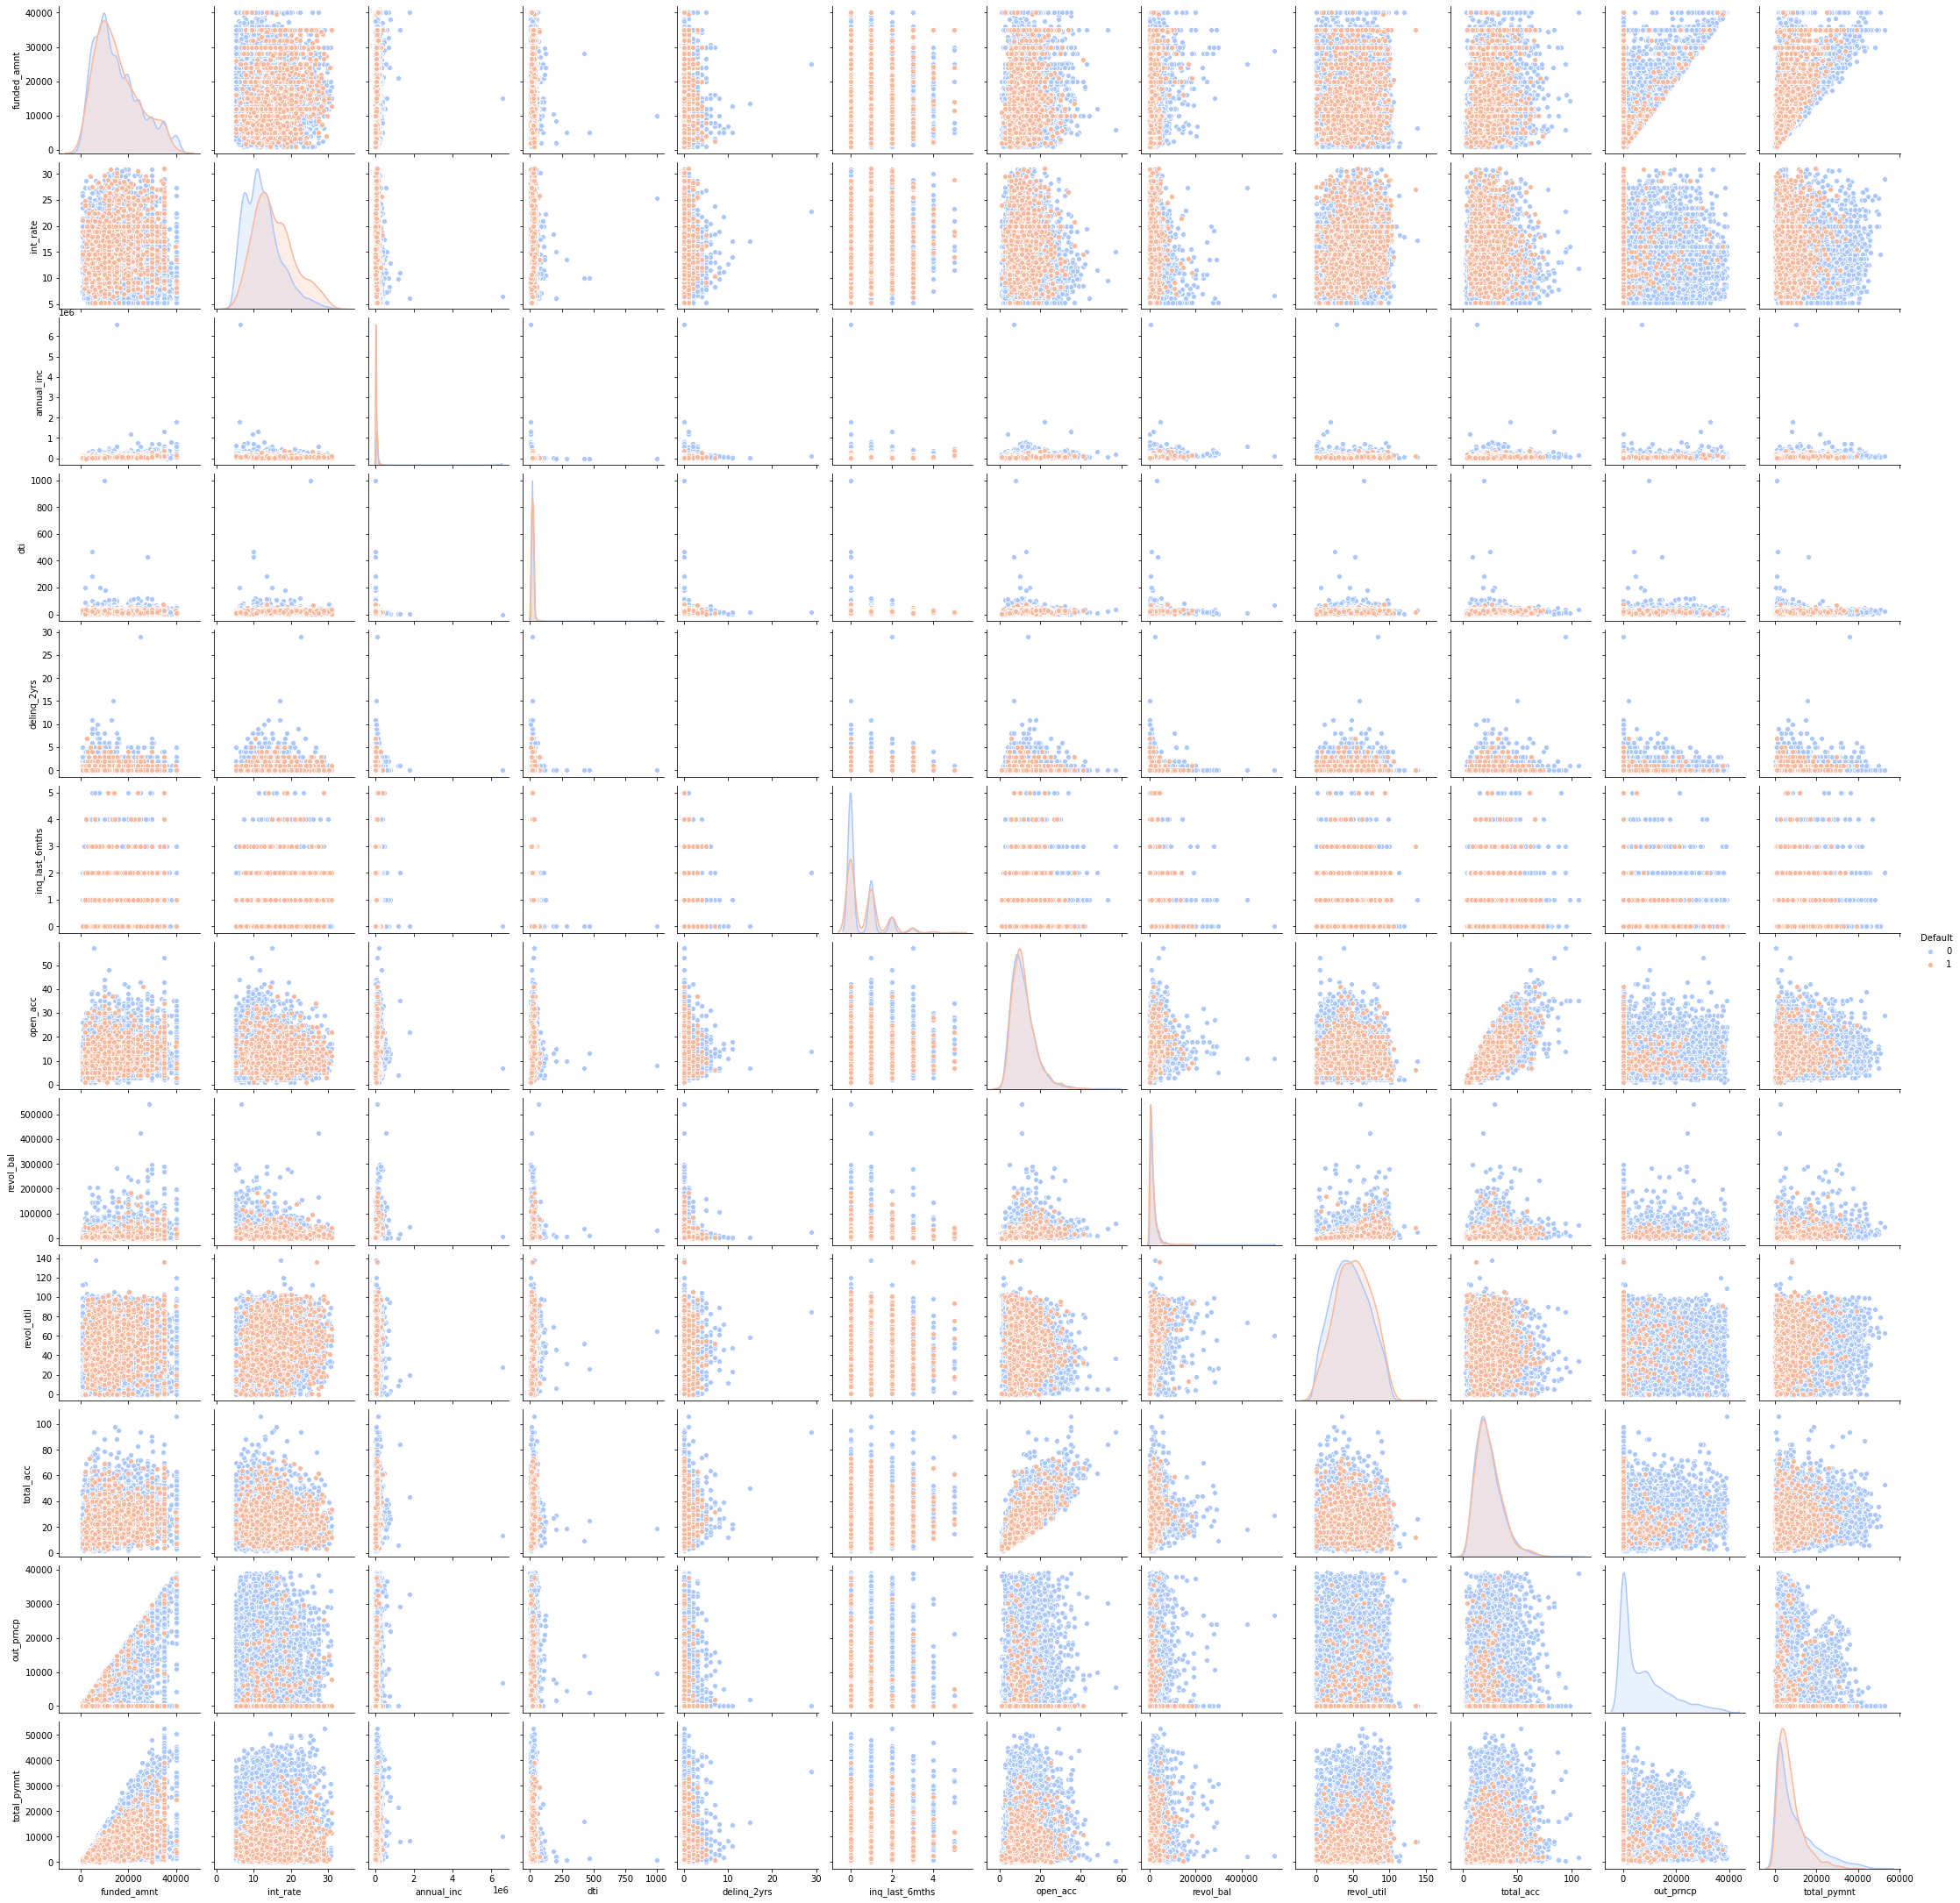

In [36]:
import seaborn as sns
sns.pairplot(df_num,hue='Default',palette='coolwarm')

<p style="color:red"><b> Outliers Treatement </b> </p>

In [34]:
len(df_num.columns)

13

funded_amnt          AxesSubplot(0.125,0.749828;0.227941x0.130172)
int_rate          AxesSubplot(0.398529,0.749828;0.227941x0.130172)
annual_inc        AxesSubplot(0.672059,0.749828;0.227941x0.130172)
dti                  AxesSubplot(0.125,0.593621;0.227941x0.130172)
delinq_2yrs       AxesSubplot(0.398529,0.593621;0.227941x0.130172)
inq_last_6mths    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
open_acc             AxesSubplot(0.125,0.437414;0.227941x0.130172)
revol_bal         AxesSubplot(0.398529,0.437414;0.227941x0.130172)
revol_util        AxesSubplot(0.672059,0.437414;0.227941x0.130172)
total_acc            AxesSubplot(0.125,0.281207;0.227941x0.130172)
out_prncp         AxesSubplot(0.398529,0.281207;0.227941x0.130172)
total_pymnt       AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Default                 AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

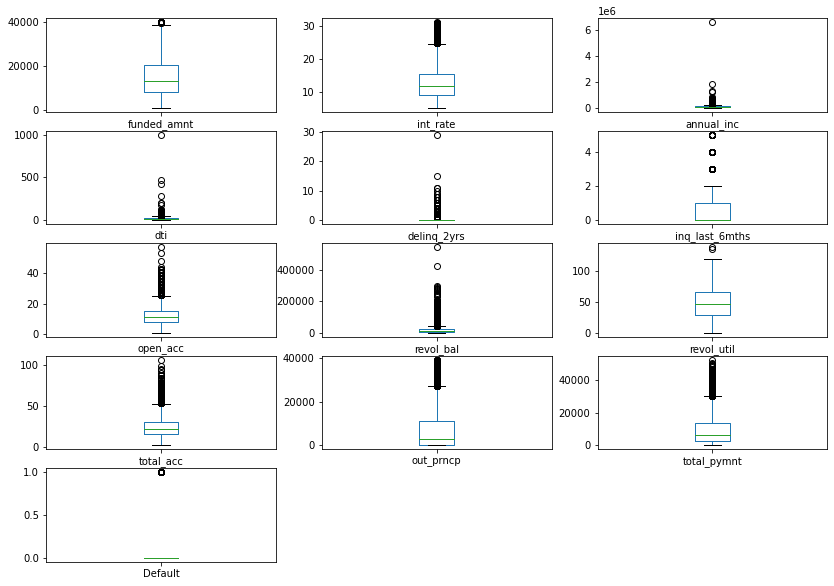

In [35]:
# 12 varibles -> 4x3
df_num.plot(kind= 'box' , subplots=True, layout=(5,3),figsize=(14,10))

# Substituir pela média

In [36]:
def outlier_mean(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [37]:
df_out_mean=outlier_mean(df_num)
df_out_mean.head(5)

,funded_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,Default
49910,"14,000.0000000000",8.1900000000,"50,000.0000000000",24.9600000000,0.0000000000,0.0000000000,10.0000000000,"14,454.0000000000",33.0000000000,19.0000000000,"12,959.7600000000","1,287.9700000000",0.0000000000
339232,"5,000.0000000000",7.9600000000,"32,000.0000000000",4.4600000000,0.0000000000,0.0000000000,5.0000000000,"3,723.0000000000",47.7000000000,6.0000000000,"3,859.2600000000","1,404.8900000000",0.0000000000
1037198,"16,000.0000000000",10.9900000000,"110,000.0000000000",15.2100000000,0.0000000000,0.0000000000,17.0000000000,"13,591.0000000000",36.1000000000,32.0000000000,0.0000000000,"17,769.2100000000",0.0000000000
66297,"13,200.0000000000",11.8000000000,"90,000.0000000000",12.8900000000,0.0000000000,0.0000000000,7.0000000000,"11,193.5000000000",11.8000000000,50.0000000000,"2,566.1500000000","2,631.0300000000",0.0000000000
383185,"15,000.0000000000",6.7100000000,"123,000.0000000000",19.7100000000,0.0000000000,0.0000000000,12.0000000000,"16,135.0000000000",34.0000000000,29.0000000000,0.0000000000,"15,296.5347600000",0.0000000000


funded_amnt          AxesSubplot(0.125,0.749828;0.227941x0.130172)
int_rate          AxesSubplot(0.398529,0.749828;0.227941x0.130172)
annual_inc        AxesSubplot(0.672059,0.749828;0.227941x0.130172)
dti                  AxesSubplot(0.125,0.593621;0.227941x0.130172)
delinq_2yrs       AxesSubplot(0.398529,0.593621;0.227941x0.130172)
inq_last_6mths    AxesSubplot(0.672059,0.593621;0.227941x0.130172)
open_acc             AxesSubplot(0.125,0.437414;0.227941x0.130172)
revol_bal         AxesSubplot(0.398529,0.437414;0.227941x0.130172)
revol_util        AxesSubplot(0.672059,0.437414;0.227941x0.130172)
total_acc            AxesSubplot(0.125,0.281207;0.227941x0.130172)
out_prncp         AxesSubplot(0.398529,0.281207;0.227941x0.130172)
total_pymnt       AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Default                 AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

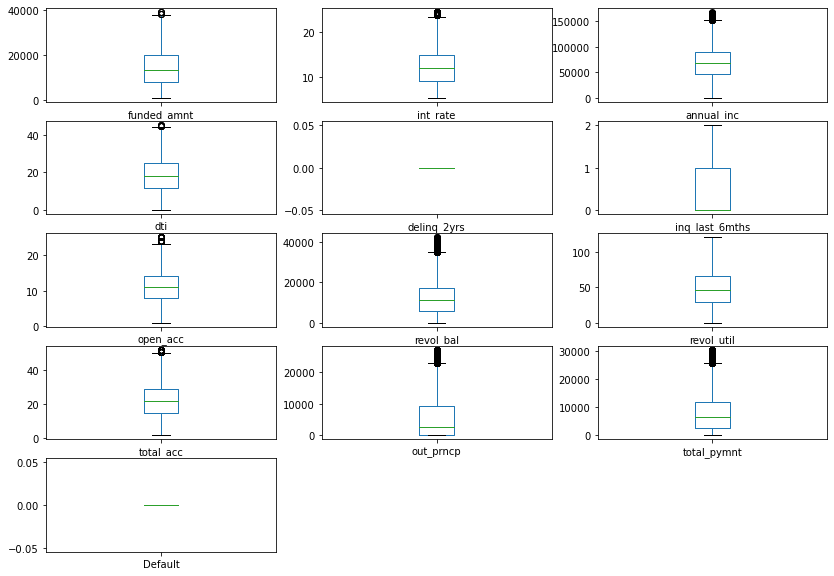

In [38]:
# 12 varibles -> 4x3
df_out_mean.plot(kind= 'box' , subplots=True, layout=(5,3),figsize=(14,10))

In [39]:
df_out_mean.head(5)

,funded_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,Default
49910,"14,000.0000000000",8.1900000000,"50,000.0000000000",24.9600000000,0.0000000000,0.0000000000,10.0000000000,"14,454.0000000000",33.0000000000,19.0000000000,"12,959.7600000000","1,287.9700000000",0.0000000000
339232,"5,000.0000000000",7.9600000000,"32,000.0000000000",4.4600000000,0.0000000000,0.0000000000,5.0000000000,"3,723.0000000000",47.7000000000,6.0000000000,"3,859.2600000000","1,404.8900000000",0.0000000000
1037198,"16,000.0000000000",10.9900000000,"110,000.0000000000",15.2100000000,0.0000000000,0.0000000000,17.0000000000,"13,591.0000000000",36.1000000000,32.0000000000,0.0000000000,"17,769.2100000000",0.0000000000
66297,"13,200.0000000000",11.8000000000,"90,000.0000000000",12.8900000000,0.0000000000,0.0000000000,7.0000000000,"11,193.5000000000",11.8000000000,50.0000000000,"2,566.1500000000","2,631.0300000000",0.0000000000
383185,"15,000.0000000000",6.7100000000,"123,000.0000000000",19.7100000000,0.0000000000,0.0000000000,12.0000000000,"16,135.0000000000",34.0000000000,29.0000000000,0.0000000000,"15,296.5347600000",0.0000000000


# Categorical variable analysis
we let the variable Default to calculate the IV

In [40]:
df_cat = df_sample.loc[:,['term','grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose',
                  'addr_state','earliest_cr_line','pub_rec', 'Default']]

In [41]:
# Calculate information value
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv, data

# 1 var - term

In [42]:
iv, data = calc_iv(df_cat, 'term', 'Default')
print('IV:', iv)
data

IV: 0.02129047183740977


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,term,36 months,7125,6478,647,0.7125000000,0.0908070175,0.7192183857,0.6515609265,0.0987941375,0.0066841603
1,term,60 months,2875,2529,346,0.2875000000,0.1203478261,0.2807816143,0.3484390735,-0.2158861961,0.0146063115


# 2 var pub_rec

In [43]:
df_cat['pub_rec'].value_counts()

0     8409
1     1389
2      129
3       42
4       14
5        8
6        3
9        2
7        1
13       1
11       1
10       1
Name: pub_rec, dtype: int64

In [44]:
# We create a group to the elementes greater than 2
pub_rec_clas = [
    (df_cat['pub_rec'] == 0),
    (df_cat['pub_rec'] == 1),
    (df_cat['pub_rec'] >= 2)]
choices = [0,1,2]

df_cat['pub_rec_2'] = np.select(pub_rec_clas, choices, default='null')

In [45]:
df_cat['pub_rec_2'].value_counts()

0    8409
1    1389
2     202
Name: pub_rec_2, dtype: int64

In [46]:
iv, data = calc_iv(df_cat, 'pub_rec_2', 'Default')
print('IV:', iv)
data

IV: 0.012046007597216267


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,pub_rec_2,0,8409,7601,808,0.8409000000,0.0960875253,0.8438991895,0.8136958711,0.0364463703,0.0011008013
1,pub_rec_2,1,1389,1238,151,0.1389000000,0.1087113031,0.1374486510,0.1520644512,-0.1010540513,0.0014769858
2,pub_rec_2,2,202,168,34,0.0202000000,0.1683168317,0.0186521594,0.0342396777,-0.6074232130,0.0094682205


# 3 Var  grade

In [47]:
print( df_cat['grade'].value_counts(), '\n Percent \n ', df_cat['grade'].value_counts(normalize=True))

B    3040
C    2773
A    2188
D    1304
E     516
F     141
G      38
Name: grade, dtype: int64 
 Percent 
  B   0.3040000000
C   0.2773000000
A   0.2188000000
D   0.1304000000
E   0.0516000000
F   0.0141000000
G   0.0038000000
Name: grade, dtype: float64


In [48]:
iv, data = calc_iv(df_cat, 'grade', 'Default')
print('IV:', iv)
data

IV: 0.5663316818826731


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,grade,A,2188,2133,55,0.2188000000,0.0251371115,0.2368158099,0.0553877140,1.4529248655,0.2636013919
1,grade,B,3040,2813,227,0.3040000000,0.0746710526,0.3123126457,0.2286002014,0.3120301233,0.0261208043
2,grade,C,2773,2482,291,0.2773000000,0.1049404977,0.2755634506,0.2930513595,-0.0615299691,0.0010760305
3,grade,D,1304,1089,215,0.1304000000,0.1648773006,0.1209059620,0.2165156093,-0.5826495729,0.0557069201
4,grade,E,516,386,130,0.0516000000,0.2519379845,0.0428555568,0.1309164149,-1.1167237487,0.0983396516
5,grade,F,141,85,56,0.0141000000,0.3971631206,0.0094371045,0.0563947633,-1.7877271020,0.0839474794
6,grade,G,38,19,19,0.0038000000,0.5000000000,0.0021094704,0.0191339376,-2.2050266677,0.0375394041


# 4 var  purpose

In [49]:
df_cat['purpose'].value_counts()

debt_consolidation    5525
credit_card           2409
home_improvement       676
other                  637
major_purchase         225
medical                121
car                    103
small_business         101
house                   82
moving                  59
vacation                55
renewable_energy         7
Name: purpose, dtype: int64

In [50]:
iv, data = calc_iv(df_cat, 'purpose', 'Default')
print('IV:', iv)
data

IV: 0.04119886676001709


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,purpose,car,103,88,15,0.0103000000,0.1456310680,0.0097701787,0.0151057402,-0.4357400544,0.0023249178
1,purpose,credit_card,2409,2238,171,0.2409000000,0.0709838107,0.2484734096,0.1722054381,0.3666476646,0.0279634736
2,purpose,debt_consolidation,5525,4923,602,0.5525000000,0.1089592760,0.5465748862,0.6062437059,-0.1036107333,0.0061823302
3,purpose,home_improvement,676,606,70,0.0676000000,0.1035502959,0.0672810037,0.0704934542,-0.0466419237,0.0001498349
4,purpose,house,82,69,13,0.0082000000,0.1585365854,0.0076607083,0.0130916415,-0.5358695206,0.0029102715
5,purpose,major_purchase,225,203,22,0.0225000000,0.0977777778,0.0225380260,0.0221550856,0.0171368579,0.0000065624
6,purpose,medical,121,111,10,0.0121000000,0.0826446281,0.0123237482,0.0100704935,0.2019184406,0.0004549737
7,purpose,moving,59,51,8,0.0059000000,0.1355932203,0.0056622627,0.0080563948,-0.3526425767,0.0008442729
8,purpose,other,637,572,65,0.0637000000,0.1020408163,0.0635061619,0.0654582075,-0.0302749463,0.0000590981
9,purpose,renewable_energy,7,6,1,0.0007000000,0.1428571429,0.0006661486,0.0010070493,-0.4132671985,0.0001408831


In [51]:
# We create groups acoording to the features extracted by IV. Ex, house and Car have similar IV, them they are in the same group
purpose_clas = [
    (df_cat['purpose'].str.strip()  == "debt_consolidation"), 
    (df_cat['purpose'].str.strip()  == "car"),
    (df_cat['purpose'].str.strip()  == "house"), 
    (df_cat['purpose'].str.strip()  == "renewable_energy"),
    (df_cat['purpose'].str.strip()  == "credit_card")]
choices = [0,0,0,0,1]

df_cat['purpose_2'] = np.select(purpose_clas, choices, default=2)

In [52]:
df_cat['purpose_2'].value_counts()

0    5717
1    2409
2    1874
Name: purpose_2, dtype: int64

In [53]:
iv, data = calc_iv(df_cat, 'purpose_2', 'Default')
print('IV:', iv)
data

IV: 0.03648020352160046


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,purpose_2,0,5717,5086,631,0.5717000000,0.1103725730,0.5646719218,0.6354481370,-0.1180855843,0.0083576507
1,purpose_2,1,2409,2238,171,0.2409000000,0.0709838107,0.2484734096,0.1722054381,0.3666476646,0.0279634736
2,purpose_2,2,1874,1683,191,0.1874000000,0.1019210245,0.1868546686,0.1923464250,-0.0289669016,0.0001590792


# 5 var home_ownership

In [54]:
df_cat['home_ownership'].value_counts() 

MORTGAGE    4910
RENT        3837
OWN         1244
ANY            9
Name: home_ownership, dtype: int64

In [55]:
iv, data = calc_iv(df_cat, 'home_ownership', 'Default')
print('IV:', iv)
data

IV: 0.021995095024432663


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,home_ownership,ANY,9,9,0,0.0009000000,0.0000000000,0.0009992228,0.0000000000,0.0000000000,0.0000000000
1,home_ownership,MORTGAGE,4910,4483,427,0.4910000000,0.0869653768,0.4977239925,0.4300100705,0.1462370632,0.0099022851
2,home_ownership,OWN,1244,1122,122,0.1244000000,0.0980707395,0.1245697791,0.1228600201,0.0138203736,0.0000236295
3,home_ownership,RENT,3837,3393,444,0.3837000000,0.1157154027,0.3767070057,0.4471299094,-0.1713814654,0.0120691804


# 6 var verification_status

In [56]:
df_cat['verification_status'].value_counts() 

Source Verified    4076
Not Verified       3423
Verified           2501
Name: verification_status, dtype: int64

In [57]:
iv, data = calc_iv(df_cat, 'verification_status', 'Default')
print('IV:', iv)
data

IV: 0.08788833843601682


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,verification_status,Not Verified,3423,3193,230,0.3423000000,0.0671925212,0.3545020540,0.2316213494,0.4256102161,0.0522992832
1,verification_status,Source Verified,4076,3650,426,0.4076000000,0.1045142296,0.4052403686,0.4290030211,-0.0569835674,0.0013540807
2,verification_status,Verified,2501,2164,337,0.2501000000,0.1347461016,0.2402575774,0.3393756294,-0.3453959581,0.0342349745


# 7 var emp_length

In [58]:
df_cat['emp_length'].value_counts() 

10+ years    3323
2 years       916
3 years       834
< 1 year      824
missing       679
1 year        671
4 years       595
5 years       589
6 years       457
8 years       407
7 years       373
9 years       332
Name: emp_length, dtype: int64

In [59]:
iv, data = calc_iv(df_cat, 'emp_length', 'Default')
print('IV:', iv)
data

IV: 0.018604166008478962


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,emp_length,1 year,671,595,76,0.0671000000,0.1132637854,0.0660597313,0.0765357503,-0.1471986025,0.0015420553
1,emp_length,10+ years,3323,3004,319,0.3323000000,0.0959975925,0.3335183746,0.3212487412,0.0374822424,0.0004598934
2,emp_length,2 years,916,834,82,0.0916000000,0.0895196507,0.0925946486,0.0825780463,0.1144874874,0.0011467756
3,emp_length,3 years,834,750,84,0.0834000000,0.1007194245,0.0832685689,0.0845921450,-0.0157702601,0.0000208731
4,emp_length,4 years,595,521,74,0.0595000000,0.1243697479,0.0578438992,0.0745216516,-0.2533417192,0.0042251705
5,emp_length,5 years,589,544,45,0.0589000000,0.0764006791,0.0603974686,0.0453172205,0.2872600893,0.0043319534
6,emp_length,6 years,457,420,37,0.0457000000,0.0809628009,0.0466303986,0.0372608258,0.2243101309,0.0021016901
7,emp_length,7 years,373,331,42,0.0373000000,0.1126005362,0.0367491951,0.0422960725,-0.1405779106,0.0007797684
8,emp_length,8 years,407,357,50,0.0407000000,0.1228501229,0.0396358388,0.0503524673,-0.2393138914,0.0025646381
9,emp_length,9 years,332,293,39,0.0332000000,0.1174698795,0.0325302542,0.0392749245,-0.1884157049,0.0012708018


In [60]:
# We create groups acoording to the features extracted by IV.
purpose_clas = [
    (df_cat['emp_length'].str.strip()  == "5 years"), 
    (df_cat['emp_length'].str.strip()  == "6 years"),
    (df_cat['emp_length'].str.strip()  == "missing"), 
    (df_cat['emp_length'].str.strip()  == "10+ years"),
    (df_cat['emp_length'].str.strip()  == "< 1 year")]
choices = [0,0,1,1,1]

df_cat['emp_length_2'] = np.select(purpose_clas, choices, default=2)

In [61]:
iv, data = calc_iv(df_cat, 'emp_length_2', 'Default')
print('IV:', iv)
data

IV: 0.010957587580636186


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,emp_length_2,0,1046,964,82,0.1046000000,0.0783938815,0.1070278672,0.0825780463,0.2593453796,0.0063409481
1,emp_length_2,1,4826,4362,464,0.4826000000,0.0961458765,0.4842899967,0.4672708963,0.0357747268,0.0006088537
2,emp_length_2,2,4128,3681,447,0.4128000000,0.1082848837,0.4086821361,0.4501510574,-0.0966455290,0.0040077858


# 8 var emp_title

In [62]:
print( df_cat['emp_title'].value_counts(), '\n Percent \n ', df_cat['emp_title'].value_counts(normalize=True))

missing                            805
Teacher                            190
Manager                            168
Owner                              104
Registered Nurse                    78
                                  ... 
Director Supply Chain                1
Director of Academic Operations      1
Dir. Technical Recruiting            1
Technology Trainer                   1
Loader                               1
Name: emp_title, Length: 5503, dtype: int64 
 Percent 
  missing                           0.0805000000
Teacher                           0.0190000000
Manager                           0.0168000000
Owner                             0.0104000000
Registered Nurse                  0.0078000000
                                      ...     
Director Supply Chain             0.0001000000
Director of Academic Operations   0.0001000000
Dir. Technical Recruiting         0.0001000000
Technology Trainer                0.0001000000
Loader                            0.00010000

In [63]:
#count the number of categories
len(set(df_cat['emp_title']))

5503

In [64]:
# We create groups acoording to the features extracted by IV.
purpose_clas = [
    (df_cat['emp_title'].str.strip()  == "missing"), 
    (df_cat['emp_title'].str.strip()  == "Teacher"),
    (df_cat['emp_title'].str.strip()  == "missing"), 
    (df_cat['emp_title'].str.strip()  == "Manager"),
    (df_cat['emp_title'].str.strip()  == "Owner")]
choices = [0,1,2,3,4]

df_cat['emp_title_2'] = np.select(purpose_clas, choices, default=5)

In [65]:
iv, data = calc_iv(df_cat, 'emp_title_2', 'Default')
print('IV:', iv)
data

IV: 0.006255739277465764


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,emp_title_2,0,805,738,67,0.0805000000,0.0832298137,0.0819362718,0.0674723061,0.1942245375,0.0028092570
1,emp_title_2,1,199,183,16,0.0199000000,0.0804020101,0.0203175308,0.0161127895,0.2318707629,0.0009749566
2,emp_title_2,3,186,169,17,0.0186000000,0.0913978495,0.0187631842,0.0171198389,0.0916587031,0.0001506269
3,emp_title_2,4,117,109,8,0.0117000000,0.0683760684,0.0121016987,0.0080563948,0.4068796728,0.0016459519
4,emp_title_2,5,8693,7808,885,0.8693000000,0.1018060508,0.8668813145,0.8912386707,-0.0277101847,0.0006749468


# 9 var addr_state

In [66]:
df_cat['addr_state'].value_counts() 

CA    1313
TX     865
NY     808
FL     756
IL     404
NJ     354
PA     331
GA     316
OH     311
NC     302
VA     286
MI     266
AZ     253
CO     236
MD     234
MA     232
MN     189
WA     188
TN     174
IN     173
CT     161
NV     144
MO     143
SC     126
OR     120
WI     118
AL     109
LA     104
KY      97
AR      81
KS      81
OK      80
MS      80
UT      63
WV      46
NE      46
HI      42
NH      42
RI      37
ME      36
NM      34
ID      29
AK      28
DE      28
ND      27
MT      25
DC      24
VT      22
WY      18
SD      18
Name: addr_state, dtype: int64

In [67]:
iv, data = calc_iv(df_cat, 'addr_state', 'Default')
print('IV:', iv)
data

IV: 0.07052689789440761


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,addr_state,AK,28,27,1,0.0028000000,0.0357142857,0.0029976685,0.0010070493,1.0908101983,0.0021713877
1,addr_state,AL,109,94,15,0.0109000000,0.1376146789,0.0104363273,0.0151057402,-0.3697820866,0.0017266652
2,addr_state,AR,81,69,12,0.0081000000,0.1481481481,0.0076607083,0.0120845921,-0.4558268129,0.0020165249
3,addr_state,AZ,253,232,21,0.0253000000,0.0830039526,0.0257577440,0.0211480363,0.1971882662,0.0009089803
4,addr_state,CA,1313,1176,137,0.1313000000,0.1043412034,0.1305651160,0.1379657603,-0.0551334651,0.0004080232
5,addr_state,CO,236,214,22,0.0236000000,0.0932203390,0.0237592983,0.0221550856,0.0699068939,0.0001121455
6,addr_state,CT,161,145,16,0.0161000000,0.0993788820,0.0160985900,0.0161127895,-0.0008816476,0.0000000125
7,addr_state,DC,24,23,1,0.0024000000,0.0416666667,0.0025535694,0.0010070493,0.9304675482,0.0014389868
8,addr_state,DE,28,28,0,0.0028000000,0.0000000000,0.0031086932,0.0000000000,0.0000000000,0.0000000000
9,addr_state,FL,756,678,78,0.0756000000,0.1031746032,0.0752747863,0.0785498489,-0.0425882065,0.0001394790


# 10 Var  issue_d

In [68]:
df_cat['issue_d'].value_counts() 

Mar-16    604
Oct-18    478
Aug-18    464
May-18    444
Dec-15    428
Jun-18    405
Dec-18    399
Apr-18    399
Nov-18    397
Feb-16    392
Aug-16    382
Jul-18    371
Feb-18    350
Jun-16    344
Oct-15    342
Mar-18    341
Nov-15    340
Sep-18    335
Nov-16    333
Apr-16    331
Jan-18    327
Jan-16    321
Dec-16    312
Oct-16    303
Jul-16    293
May-16    283
Sep-16    282
Name: issue_d, dtype: int64

In [69]:
iv, data = calc_iv(df_cat, 'issue_d', 'Default')
print('IV:', iv)
data

IV: 0.9610388835155999


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,issue_d,Apr-16,331,263,68,0.0331000000,0.2054380665,0.0291995115,0.0684793555,-0.8523803407,0.0334813668
1,issue_d,Apr-18,399,382,17,0.0399000000,0.0426065163,0.0424114578,0.0171198389,0.9071805968,0.0229440659
2,issue_d,Aug-16,382,313,69,0.0382000000,0.1806282723,0.0347507494,0.0694864048,-0.6929299818,0.0240693771
3,issue_d,Aug-18,464,458,6,0.0464000000,0.0129310345,0.0508493394,0.0060422961,2.1300830471,0.0954427234
4,issue_d,Dec-15,428,343,85,0.0428000000,0.1985981308,0.0380814922,0.0855991944,-0.8099474771,0.0384868430
5,issue_d,Dec-16,312,282,30,0.0312000000,0.0961538462,0.0313089819,0.0302114804,0.0356830215,0.0000391622
6,issue_d,Dec-18,399,399,0,0.0399000000,0.0000000000,0.0442988786,0.0000000000,0.0000000000,0.0000000000
7,issue_d,Feb-16,392,322,70,0.0392000000,0.1785714286,0.0357499722,0.0704934542,-0.6789703642,0.0235897946
8,issue_d,Feb-18,350,333,17,0.0350000000,0.0485714286,0.0369712446,0.0171198389,0.7699024782,0.0152836465
9,issue_d,Jan-16,321,259,62,0.0321000000,0.1931464174,0.0287554125,0.0624370594,-0.7753329911,0.0261144921


In [70]:
# We create groups acoording to the features extracted by IV.
purpose_clas = [
    (df_cat['issue_d'].str.strip()  == "Aug-18"), 
    (df_cat['issue_d'].str.strip()  == "Sep-18"),
    (df_cat['issue_d'].str.strip()  == "Oct-18"), 
    (df_cat['issue_d'].str.strip()  == "Nov-18"),
    
    (df_cat['issue_d'].str.strip()  == "Apr-16"), 
    (df_cat['issue_d'].str.strip()  == "May-18"),
    (df_cat['issue_d'].str.strip()  == "Dec-15"), 
    (df_cat['issue_d'].str.strip()  == "Jun-18"),
    (df_cat['issue_d'].str.strip()  == "Jul-18"),       
    
    (df_cat['issue_d'].str.strip()  == "Apr-18"), 
    (df_cat['issue_d'].str.strip()  == "Feb-16"),
    (df_cat['issue_d'].str.strip()  == "Mar-16"), 
    (df_cat['issue_d'].str.strip()  == "Aug-16"),
    (df_cat['issue_d'].str.strip()  == "Jan-16")] 
choices = [0,0,0,0,1,1,1,1,1,2,2,2,2,2]

df_cat['issue_d_2'] = np.select(purpose_clas, choices, default=3)

In [71]:
df_cat.groupby(['issue_d', 'issue_d_2']).agg({'Default': ['count', 'min', 'max']})

Default        
                    count min max
issue_d issue_d_2                
Apr-16  1             331   0   1
Apr-18  2             399   0   1
Aug-16  2             382   0   1
Aug-18  0             464   0   1
Dec-15  1             428   0   1
Dec-16  3             312   0   1
Dec-18  3             399   0   0
Feb-16  2             392   0   1
Feb-18  3             350   0   1
Jan-16  2             321   0   1
Jan-18  3             327   0   1
Jul-16  3             293   0   1
Jul-18  1             371   0   1
Jun-16  3             344   0   1
Jun-18  1             405   0   1
Mar-16  2             604   0   1
Mar-18  3             341   0   1
May-16  3             283   0   1
May-18  1             444   0   1
Nov-15  3             340   0   1
Nov-16  3             333   0   1
Nov-18  0             397   0   1
Oct-15  3             342   0   1
Oct-16  3             303   0   1
Oct-18  0             478   0   1
Sep-16  3             282   0   1
Sep-18  0             335   0   1

In [72]:
iv, data = calc_iv(df_cat, 'issue_d_2', 'Default')
print('IV:', iv)
data

IV: 0.5212646032654165


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,issue_d_2,0,1674,1661,13,0.1674000000,0.0077658303,0.1844121239,0.0130916415,2.6451990844,0.4531767832
1,issue_d_2,1,1979,1796,183,0.1979000000,0.0924709449,0.1994004663,0.1842900302,0.0788044283,0.0011907693
2,issue_d_2,2,2098,1782,316,0.2098000000,0.1506196378,0.1978461197,0.3182275932,-0.4752772733,0.0572145785
3,issue_d_2,3,4249,3768,481,0.4249000000,0.1132031066,0.4183412901,0.4843907351,-0.1465943021,0.0096824723


# 11 earliest_cr_line

In [73]:
df_cat['earliest_cr_line'].value_counts() 

Aug-03    85
Aug-04    77
Nov-04    76
Jun-05    76
Jul-04    73
          ..
Jan-72     1
Sep-75     1
May-68     1
Feb-65     1
Apr-68     1
Name: earliest_cr_line, Length: 534, dtype: int64

In [74]:
#count the number of categories
len(set(df_cat['earliest_cr_line']))

534

In [75]:
# As we have a lot of categories, we create a variable "time" that is 01jan2020 - earliest_cr_line

treatement to transforme the var earliest_cr_line into datetime

In [76]:
# Extracte the month
df_cat['earliest_cr_line'].str.slice(0, 3).value_counts() 

Aug    1039
Sep     942
Oct     936
Nov     855
Mar     855
Jun     814
Jul     814
Dec     791
Apr     783
Feb     752
May     741
Jan     678
Name: earliest_cr_line, dtype: int64

Create the var Month 

In [77]:
#  
df_cat['earliest_cr_line_month']=df_cat['earliest_cr_line'].str.slice(0, 3).str.strip()

In [78]:
# We create groups acoording to the features extracted by IV.
conditions  = [
    (df_cat['earliest_cr_line_month'] == "Jan"), 
    (df_cat['earliest_cr_line_month'] == "Feb"),
    (df_cat['earliest_cr_line_month'] == "Mar"), 
    (df_cat['earliest_cr_line_month'] == "Apr"),
    (df_cat['earliest_cr_line_month'] == "May"), 
    (df_cat['earliest_cr_line_month'] == "Jun"),
    (df_cat['earliest_cr_line_month'] == "Jul"), 
    (df_cat['earliest_cr_line_month'] == "Aug"),
    (df_cat['earliest_cr_line_month'] == "Sep"),       
    (df_cat['earliest_cr_line_month'] == "Oct"), 
    (df_cat['earliest_cr_line_month'] == "Nov"),
    (df_cat['earliest_cr_line_month'] == "Dec")] 
choices = [1,2,3,4,5,6,7,8,9,10,11,12]

df_cat['earliest_cr_line_month1'] = np.select(conditions , choices, default=13)

In [79]:
df_cat.head(5)

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,pub_rec,Default,pub_rec_2,purpose_2,emp_length_2,emp_title_2,issue_d_2,earliest_cr_line_month,earliest_cr_line_month1
49910,36 months,A,missing,missing,RENT,Not Verified,Nov-18,debt_consolidation,WA,Sep-00,0,0,0,0,1,0,0,Sep,9
339232,36 months,A,Seinor food and beverage operator,8 years,RENT,Not Verified,May-18,credit_card,FL,Feb-12,0,0,0,1,2,5,1,Feb,2
1037198,60 months,B,Underwriter,4 years,MORTGAGE,Not Verified,Oct-15,debt_consolidation,VA,Dec-02,0,0,0,0,2,5,3,Dec,12
66297,60 months,B,PE/Health Program Supervisor,10+ years,MORTGAGE,Source Verified,Nov-18,debt_consolidation,IL,Jan-06,0,0,0,0,1,5,0,Jan,1
383185,36 months,A,senior engineer,6 years,MORTGAGE,Not Verified,Apr-18,credit_card,MI,Apr-04,0,0,0,1,0,5,2,Apr,4


In [80]:
# year
df_cat['earliest_cr_line'].str.slice(4, 6).value_counts() 

04    754
05    681
03    667
06    595
02    571
01    539
07    507
00    499
99    473
98    347
97    342
96    330
08    320
95    292
94    259
11    229
09    221
10    208
93    198
12    186
92    160
13    156
89    146
90    142
91    138
88    123
87    114
14    106
86    106
84     91
85     89
83     69
82     49
79     44
15     38
81     37
80     27
78     22
76     20
75     18
73     14
77     13
74     10
65      9
69      8
71      8
68      6
67      5
72      4
63      2
62      2
66      2
56      1
64      1
60      1
70      1
Name: earliest_cr_line, dtype: int64

In [81]:
df_cat['earliest_cr_line_year']=df_cat['earliest_cr_line'].str.slice(4, 6)
df_cat['earliest_cr_line_day']=1

In [82]:
df_cat.head(5)

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,pub_rec,Default,pub_rec_2,purpose_2,emp_length_2,emp_title_2,issue_d_2,earliest_cr_line_month,earliest_cr_line_month1,earliest_cr_line_year,earliest_cr_line_day
49910,36 months,A,missing,missing,RENT,Not Verified,Nov-18,debt_consolidation,WA,Sep-00,0,0,0,0,1,0,0,Sep,9,00,1
339232,36 months,A,Seinor food and beverage operator,8 years,RENT,Not Verified,May-18,credit_card,FL,Feb-12,0,0,0,1,2,5,1,Feb,2,12,1
1037198,60 months,B,Underwriter,4 years,MORTGAGE,Not Verified,Oct-15,debt_consolidation,VA,Dec-02,0,0,0,0,2,5,3,Dec,12,02,1
66297,60 months,B,PE/Health Program Supervisor,10+ years,MORTGAGE,Source Verified,Nov-18,debt_consolidation,IL,Jan-06,0,0,0,0,1,5,0,Jan,1,06,1
383185,36 months,A,senior engineer,6 years,MORTGAGE,Not Verified,Apr-18,credit_card,MI,Apr-04,0,0,0,1,0,5,2,Apr,4,04,1


In [83]:
df_cat.loc[df_cat['earliest_cr_line_year'].astype(int) <= 20, 'year'] = df_cat['earliest_cr_line_year'].astype(int)+2000
df_cat.loc[df_cat['earliest_cr_line_year'].astype(int) > 20, 'year'] = df_cat['earliest_cr_line_year'].astype(int)+1900

In [84]:
df_cat['date']=df_cat['year']*10000+df_cat['earliest_cr_line_month1']*100+df_cat['earliest_cr_line_day']

In [85]:
df_cat['date']=df_cat['date'].astype(int)
df_cat['dates'] = pd.to_datetime(df_cat['date'], format='%Y%m%d')
df_cat.head(5)

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,pub_rec,Default,pub_rec_2,purpose_2,emp_length_2,emp_title_2,issue_d_2,earliest_cr_line_month,earliest_cr_line_month1,earliest_cr_line_year,earliest_cr_line_day,year,date,dates
49910,36 months,A,missing,missing,RENT,Not Verified,Nov-18,debt_consolidation,WA,Sep-00,0,0,0,0,1,0,0,Sep,9,00,1,"2,000.0000000000",20000901,2000-09-01
339232,36 months,A,Seinor food and beverage operator,8 years,RENT,Not Verified,May-18,credit_card,FL,Feb-12,0,0,0,1,2,5,1,Feb,2,12,1,"2,012.0000000000",20120201,2012-02-01
1037198,60 months,B,Underwriter,4 years,MORTGAGE,Not Verified,Oct-15,debt_consolidation,VA,Dec-02,0,0,0,0,2,5,3,Dec,12,02,1,"2,002.0000000000",20021201,2002-12-01
66297,60 months,B,PE/Health Program Supervisor,10+ years,MORTGAGE,Source Verified,Nov-18,debt_consolidation,IL,Jan-06,0,0,0,0,1,5,0,Jan,1,06,1,"2,006.0000000000",20060101,2006-01-01
383185,36 months,A,senior engineer,6 years,MORTGAGE,Not Verified,Apr-18,credit_card,MI,Apr-04,0,0,0,1,0,5,2,Apr,4,04,1,"2,004.0000000000",20040401,2004-04-01


In [86]:
from dateutil.parser import parse
df_cat['time'] = parse('01, Jan, 2020') - df_cat['dates']
df_cat['time']=df_cat['time']/np.timedelta64(1,'D')
df_cat.head(3)


,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,pub_rec,Default,pub_rec_2,purpose_2,emp_length_2,emp_title_2,issue_d_2,earliest_cr_line_month,earliest_cr_line_month1,earliest_cr_line_year,earliest_cr_line_day,year,date,dates,time
49910,36 months,A,missing,missing,RENT,Not Verified,Nov-18,debt_consolidation,WA,Sep-00,0,0,0,0,1,0,0,Sep,9,00,1,"2,000.0000000000",20000901,2000-09-01,"7,061.0000000000"
339232,36 months,A,Seinor food and beverage operator,8 years,RENT,Not Verified,May-18,credit_card,FL,Feb-12,0,0,0,1,2,5,1,Feb,2,12,1,"2,012.0000000000",20120201,2012-02-01,"2,891.0000000000"
1037198,60 months,B,Underwriter,4 years,MORTGAGE,Not Verified,Oct-15,debt_consolidation,VA,Dec-02,0,0,0,0,2,5,3,Dec,12,02,1,"2,002.0000000000",20021201,2002-12-01,"6,240.0000000000"


# Select the final variables

In [87]:
df_cat_2 = df_cat.loc[:,['term','grade', 'emp_title_2', 'emp_length_2', 'home_ownership', 'verification_status', 'issue_d_2', 'purpose_2',
                  'addr_state','time','pub_rec_2', 'Default']]

concat the variable numeric and categoric 

In [88]:
df_2 = pd.concat([df_cat_2, df_out_mean.drop('Default', axis=1, inplace=True)  ], axis=1).reindex(df_cat.index)

In [89]:
df_2

,term,grade,emp_title_2,emp_length_2,home_ownership,verification_status,issue_d_2,purpose_2,addr_state,time,pub_rec_2,Default
49910,36 months,A,0,1,RENT,Not Verified,0,0,WA,"7,061.0000000000",0,0
339232,36 months,A,5,2,RENT,Not Verified,1,1,FL,"2,891.0000000000",0,0
1037198,60 months,B,5,2,MORTGAGE,Not Verified,3,0,VA,"6,240.0000000000",0,0
66297,60 months,B,5,1,MORTGAGE,Source Verified,0,0,IL,"5,113.0000000000",0,0
383185,36 months,A,5,0,MORTGAGE,Not Verified,2,1,MI,"5,753.0000000000",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
624067,36 months,E,5,2,RENT,Verified,3,2,CA,"2,678.0000000000",0,0
107152,60 months,A,5,1,RENT,Not Verified,0,1,PA,"11,232.0000000000",0,0
8136,36 months,A,5,2,RENT,Not Verified,3,1,TX,"4,901.0000000000",0,0
283356,36 months,D,5,2,RENT,Source Verified,1,0,AZ,"3,409.0000000000",0,0


<center><h2 style="color:red"><b>Feature engineering</b> </h2> </center> 

In [90]:
df_3=pd.get_dummies(df_2) 

In [91]:
#Create dummies
df_3.head(5)

,emp_title_2,emp_length_2,issue_d_2,purpose_2,time,Default,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,pub_rec_2_0,pub_rec_2_1,pub_rec_2_2
49910,0,1,0,0,"7,061.0000000000",0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
339232,5,2,1,1,"2,891.0000000000",0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1037198,5,2,3,0,"6,240.0000000000",0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
66297,5,1,0,0,"5,113.0000000000",0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
383185,5,0,2,1,"5,753.0000000000",0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [92]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 49910 to 186624
Data columns (total 75 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   emp_title_2                          10000 non-null  int32  
 1   emp_length_2                         10000 non-null  int32  
 2   issue_d_2                            10000 non-null  int32  
 3   purpose_2                            10000 non-null  int32  
 4   time                                 10000 non-null  float64
 5   Default                              10000 non-null  int32  
 6   term_ 36 months                      10000 non-null  uint8  
 7   term_ 60 months                      10000 non-null  uint8  
 8   grade_A                              10000 non-null  uint8  
 9   grade_B                              10000 non-null  uint8  
 10  grade_C                              10000 non-null  uint8  
 11  grade_D                

 to separate the outcome

In [93]:
outcome=df_3['Default']

In [94]:
features=df_3.drop('Default', axis=1)

# decision tree 

In [95]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [96]:
def etc_importances(features, outcome):
  model = ExtraTreesClassifier(n_estimators = 200, criterion = 'entropy', verbose = 0)
  model.fit(features, np.array(outcome).ravel())
  
  importances = model.feature_importances_
  variables = np.array(features.columns)
  indices = np.argsort(importances)[::-1]
  importances = importances[indices]
  variables = variables[indices]
  
  return variables, importances

In [97]:
variables, importances = etc_importances(features, outcome)

In [98]:
outcome.describe()

count   10,000.0000000000
mean         0.0993000000
std          0.2990793454
min          0.0000000000
25%          0.0000000000
50%          0.0000000000
75%          0.0000000000
max          1.0000000000
Name: Default, dtype: float64

Plot importances 

In [99]:
def sum_and_plot_importances(variables, importances):
  sum_importances = pd.DataFrame()
  for i in range(importances.size):
    sum_importance = importances[:(i+1)].sum()
    this_variable = pd.Series([variables[i], sum_importance])
    sum_importances = sum_importances.append(this_variable, ignore_index = True)
  plt.scatter(sum_importances.index, sum_importances.iloc[:,1])
  return sum_importances

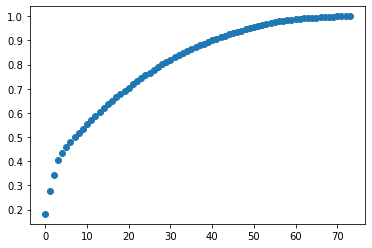

In [100]:
sum_importances = sum_and_plot_importances(variables, importances)

In [101]:
sum_importances

,0,1
0,time,0.1818609826
1,issue_d_2,0.2756801068
2,emp_length_2,0.3428644671
3,purpose_2,0.4032780320
4,emp_title_2,0.4322118090
5,grade_A,0.4574959348
6,addr_state_CA,0.4801285685
7,verification_status_Source Verified,0.4986393046
8,home_ownership_MORTGAGE,0.5169765143
9,addr_state_TX,0.5345734088


In [102]:
def keep_vars(features, sum_importances, threshold):
  keep_vars = list(sum_importances[sum_importances.iloc[:, 1] <= threshold].iloc[:, 0])
  features = features.loc[:, keep_vars]
  
  return features

In [103]:
features_c = keep_vars(features, sum_importances, threshold = 0.99)

In [104]:
features_c.shape

(10000, 62)

# Modeling
Dividindo os dados em dataset para treino e dataset para teste

In [105]:
def split_datasets(features, outcome, test_size = 0.2):
  X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size = test_size,
                                                      stratify = outcome, random_state = 0)
  y_train, y_test = np.array(y_train).ravel(), np.array(y_test).ravel()
  
  return X_train, X_test, y_train, y_test

In [106]:
X_train, X_test, y_train, y_test = split_datasets(features_c, outcome)

https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772 

Métodos com árvores de decisão: https://iaexpert.com.br/index.php/2019/04/18/xgboost-a-evolucao-das-arvores-de-decisao/

Gradient Boosting: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html


RandomForestClassifier

In [193]:
#n_estimators:  número de árvores 
# CV : Validação cruzada, normalmento cv é 10
# n_jobs : número de processos rodando em paralelo (-1 usa os processadores disponíveis)
# cv_scores : resultado da validação cruzada. A base é divida em cv bases e fará cv testes e a resposta será a média dos 5 testes 

def rfc_test(X_train, y_train, n_estimators = 100, cv = 5):
  np.random.seed(0) 
  rfc = RandomForestClassifier(n_estimators = n_estimators, random_state = 0, n_jobs = -1)
  cv_scores = cross_val_score(rfc, X_train, y_train, scoring = 'roc_auc', cv = cv, n_jobs = -1)
  print('Média dos cinco testes: ', cv_scores.mean())

In [194]:
rfc_test(X_train, y_train)

Média dos cinco testes:  0.6833725248907848


Gradient Boosting

In [198]:
# learning_rate : taxa de aprendizagem 
def gbc_test(X_train, y_train, n_estimators = 100, learning_rate = 0.1, cv = 5):
  np.random.seed(0)
  gbc = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate,
                                  random_state = 0)
  cv_scores = cross_val_score(gbc, X_train, y_train, scoring = 'roc_auc', cv = cv, n_jobs = -1)
  print('Média dos cinco testes: ', cv_scores.mean())

In [199]:
gbc_test(X_train, y_train)

Média dos cinco testes:  0.7334161128056528


Logistc Regression

In [206]:
from sklearn.linear_model import LogisticRegression

def lrc_test(X_train, y_train, n_estimators = 100, learning_rate = 0.1, cv = 5):
  np.random.seed(0)
  lrc = LogisticRegression(n_estimators = n_estimators, learning_rate = learning_rate,
                                  random_state = 0)
  cv_scores = cross_val_score(lrc, X_train, y_train, scoring = 'roc_auc', cv = cv, n_jobs = -1)
  print('Média dos cinco testes: ', cv_scores.mean())

In [207]:
lrc_test(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'n_estimators'

In [ ]:

    logit_model = LogisticRegression(C=c, solver="liblinear")
    logit_model.fit(x_train, y_train)
    y_pred = logit_model.predict(x_test)
    print("Accuracy for c = %f is %f" %(c, accuracy_score(y_test, y_pred)))

In [204]:
def lrc_test(X_train, y_train, n_estimators = 100, learning_rate = 0.1, cv = 5):
    logit_model = LogisticRegression(C=c, solver="liblinear")
    logit_model.fit(x_train, y_train)
    y_pred = logit_model.predict(x_test)
    print("Accuracy for c = %f is %f" %(c, accuracy_score(y_test, y_pred))) 
    

In [205]:
lrc_test(X_train, y_train)

NameError: name 'LogisticRegression' is not defined

# The Confusion matrix is presented
# Logistica

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
knn.fit(learnset_data, learnset_labels) 
KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=5, 
                     p=2,
                     weights='uniform')

print("Predictions form the classifier:")
print(knn.predict(testset_data))
print("Target values:")
print(testset_labels)

In [ ]:
https://laptrinhx.com/end-to-end-predictive-model-using-python-framework-2627242849/

In [ ]:
https://minerandodados.com.br/analise-e-agrupamento-de-clientes-com-machine-learning-k-means/ 
https://minerandodados.com.br/arvores-de-decisao-conceitos-e-aplicacoes/


In [ ]:
https://towardsdatascience.com/end-to-end-python-framework-for-predictive-modeling-b8052bb96a78 
https://medium.com/@cassio.giehl/agrupamento-com-machine-learning-usando-python-79e55ec71c6d
    https://towardsdatascience.com/end-to-end-python-framework-for-predictive-modeling-b8052bb96a78

In [ ]:
https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

In [ ]:
# virar numerica
term
#já é dummy
pub_rec

In [ ]:
# Criar dummy
grade
home_ownership
emp_title
purpose

In [ ]:
# Fazer agrupamento
emp_title
addr_state

In [ ]:
# data 
issue_d
# Criar a variável tempo de relacionamento 
earliest_cr_line

In [ ]:
# Single selections using iloc and DataFrame
# Rows:
data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
data.iloc[1] # second row of data frame (Evan Zigomalas)
data.iloc[-1] # last row of data frame (Mi Richan)
# Columns:
data.iloc[:,0] # first column of data frame (first_name)
data.iloc[:,1] # second column of data frame (last_name)
data.iloc[:,-1] # last column of data frame (id)

In [ ]:
# Multiple row and column selections using iloc and DataFrame
data.iloc[0:5] # first five rows of dataframe
data.iloc[:, 0:2] # first two columns of data frame with all rows
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).


In [ ]:
df2=df2.rename({'col1_(-Inf,2]':'col1_a',	'col1_(2,3]':'col1_b',	'col1_(3,7]':'col1_c',	'col1_(7, Inf]':'col1_d',	'col1_Missing':'col1_e',	'col2_(-Inf,1]':'col2_a',	'col2_(1, Inf]':'col2_b',	'col2_Missing':'col2_c',	'col3_(-Inf,4]':'col3_a',	'col3_(15, Inf]':'col3_b',	'col3_(4,9]':'col3_c',	'col3_(9,15]':'col3_d',	'col3_Missing':'col3_e',	'col4_(-Inf,2]':'col4_a',	'col4_(2, Inf]':'col4_b',	'col4_Missing':'col4_c',	'col5_(-Inf,0]':'col5_a',	'col5_(0,1]':'col5_b',	'col5_(1,2]':'col5_c',	'col5_(2, Inf]':'col5_d',	'col5_Missing':'col5_e',	'col6_(-Inf,0.4232]':'col6_a',	'col6_(0.4232,0.4995]':'col6_b',	'col6_(0.4995, Inf]':'col6_c',	'col6_Missing':'col6_d',	'col7_(-Inf,0.1996]':'col7_a',	'col7_(0.1996,1.1464]':'col7_b',	'col7_(1.1464,1.2778]':'col7_c',	'col7_(1.2778,1.5056]':'col7_d',	'col7_(1.5056, Inf]':'col7_e',	'col7_Missing':'col7_f',	'col8_(-Inf,1]':'col8_a',	'col8_(1, Inf]':'col8_b',	'col8_Missing':'col8_c',	'col9_(-Inf,0]':'col9_a',	'col9_(0,1]':'col9_b',	'col9_(1,2]':'col9_c',	'col9_(2, Inf]':'col9_d',	'col9_Missing':'col9_e',	'col10_(-Inf,3]':'col1_a',	'col10_(3,4]':'col1_b',	'col10_(4, Inf]':'col1_c',	'col10_Missing':'col1_d',	'col11_(-Inf,1]':'col11_a',	'col11_(1, Inf]':'col11_b',	'col11_Missing':'col11_c'}, axis='columns')


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
formula = 'PAGTO ~ col1_a+	col1_b+	col1_c+	col1_d+	col1_e+	col2_a+	col2_b+	col2_c+	col3_a+	col3_b+	col3_c+	col3_d+	col3_e+	col4_a+	col4_b+	col4_c+	col5_a+	col5_b+	col5_c+	col5_d+	col5_e+	col6_a+	col6_b+	col6_c+	col6_d+	col7_a+	col7_b+	col7_c+	col7_d+	col7_e+	col7_f+	col8_a+	col8_b+	col8_c+	col9_a+	col9_b+	col9_c+	col9_d+	col9_e+	col1_a+	col1_b+	col1_c+	col1_d+	col11_a+	col11_b+	col11_c'

In [ ]:
model = smf.glm(formula = formula, data=df2, family=sm.families.Binomial())
result = model.fit()
print(result.summary())